# Classifier 2
This classifier works by training the model directly on the training sets of the AddNIST dataset. The model itself is constructed using a pre-built model from Keras' library of models. The model selected is DenseNet201 (https://keras.io/api/applications/densenet/)

### Connect to Google Drive to retrieve data
You can use the below cell to connect to your own google drive, if that is where you are storing the addNIST data you want to use for this notebook. If you are using data stored locally, leave this cell commented out.

In [ ]:
# to access google drive folder
# from google.colab import drive
# drive.mount('/content/drive') # When you run this you'll be prompted for a token - follow the link to generate this.

### Load data

In [ ]:
import numpy as np

train_x = np.load("data/MNP/train_x.npy", allow_pickle=True)

# Alternative file-path for use with Google Drive, if that is where you have stored your AddNIST data
#train_x = np.load("/content/drive/MyDrive/data/MNP/train_x.npy", allow_pickle=True)

In [ ]:
train_y = np.load("data/MNP/train_y.npy", allow_pickle=True)

# Alternative file-path for use with Google Drive, if that is where you have stored your AddNIST data
#train_y = np.load("/content/drive/MyDrive/data/MNP/train_y.npy", allow_pickle=True)

In [ ]:
validate_x = np.load("data/MNP/valid_x.npy", allow_pickle=True)

# Alternative file-path for use with Google Drive, if that is where you have stored your AddNIST data
#validate_x = np.load("/content/drive/MyDrive/data/MNP/valid_x.npy", allow_pickle=True)

In [ ]:
validate_y = np.load("data/MNP/valid_y.npy", allow_pickle=True)

# Alternative file-path for use with Google Drive, if that is where you have stored your AddNIST data
#validate_y = np.load("/content/drive/MyDrive/data/MNP/valid_y.npy", allow_pickle=True)

In [ ]:
test_x = np.load("data/MNP/test_x.npy", allow_pickle=True)

# Alternative file-path for use with Google Drive, if that is where you have stored your AddNIST data
#test_x = np.load("/content/drive/MyDrive/data/MNP/test_x.npy", allow_pickle=True)

In [ ]:
test_y = np.load("data/MNP/test_y.npy", allow_pickle=True)

# Alternative file-path for use with Google Drive, if that is where you have stored your AddNIST data
#test_y = np.load("/content/drive/MyDrive/data/MNP/test_y.npy", allow_pickle=True)

### Check the shape of the data

In [ ]:
print("train_x shape:", train_x.shape)
print("validate_x shape:", validate_x.shape)
print("test_x shape:", test_x.shape)

## Importing libraries

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

### Define number of classes and input shape to be used by the model

In [ ]:
num_classes = 20
input_shape = (56, 56, 3)

### Convert ground-truth label data into catagorical (One-hot-encoding) data

In [ ]:
train_y = keras.utils.to_categorical(train_y, num_classes)
validate_y = keras.utils.to_categorical(validate_y, num_classes)
test_y = keras.utils.to_categorical(test_y, num_classes)

### Reshape image data so that it can be fed into the model
Reshape from (Num_samples, colour_channels, height, width) to (Num_samples, height, width, colour_channels)

In [ ]:
train_x = np.reshape(train_x, (45000, 28, 28, 3))
validate_x = np.reshape(validate_x, (15000, 28, 28, 3))
test_x = np.reshape(test_x, (10000, 28, 28, 3))

print("train_x shape:", train_x.shape)
print("validate_x shape:", validate_x.shape)
print("test_x shape:", test_x.shape)

### Resize images
Images resized because feeding larger images into the model provides better inference (in terms of improved accuracy, loss, recall, precision and f1 scores)

In [ ]:
train_x = tf.image.resize(train_x, (56, 56), preserve_aspect_ratio=True)
validate_x = tf.image.resize(validate_x, (56, 56), preserve_aspect_ratio=True)
test_x = tf.image.resize(test_x, (56, 56), preserve_aspect_ratio=True)

# Print shape of newly resized image arrays
print("train_x shape:", train_x.shape)
print("validate_x shape:", validate_x.shape)
print("test_x shape:", test_x.shape)

### Define the model
Model used is a prebuilt model which I have configured in the following way:
- 

In [ ]:
model = keras.applications.DenseNet201(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=input_shape,
    pooling="max",
    classes=num_classes,
)

### Define callbacks
I have made use of Keras' callback api to define callbacks which will stop training when:
1. There is a plateau in the increase in validation accuracy gained between epochs (e.g., if there has been no increase in val_accuracy after 5 epochs (compared to the max val_accuracy seen in any epoch so far)
2. There is a plateau in the decrease of validation loss between epochs (e.g., if there has been no decrease in val_loss after 5 epochs (compared to the min val_loss seen in any epoch so far)

I have set `restore_best_weights = True`. This means that when the training 'early-stops', it will reset its weights back to the 'best' epoch seens so far.
> Best, being defined here as either lowest val_loss or highest val_accuracy, depending upon which callback is triggered

In [ ]:
from keras import callbacks

earlystopping_acc = callbacks.EarlyStopping(monitor ="val_accuracy", mode ="max", patience = 6, restore_best_weights = True)

### Compile and train the model



In [ ]:
# Batch size and epochs to be used when training the model
batch_size = 100
epochs = 25

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", "Precision", "Recall"])

history = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, validation_data=(validate_x, validate_y), callbacks = [earlystopping_acc])

#### Save the trained model

In [ ]:
model.save("models/task-2/Task-2-model")

## Visualise the training and validation results

### Visualise comparison of loss in training data and in validation data for each epoch in training

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') # blue dots
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # blue line
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Visualise comparison of accuracy in training data and in validation data for each epoch in training

In [ ]:
# Plot training and validation accuracy

plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Evaluate the model using the data saved for testing

In [ ]:
print("Evaluate on test data")
results = model.evaluate(test_x, test_y)

precision = results[2]
recall = results[3]

f1 = 2 * ((precision * recall) / (precision + recall))

print("Evaluate on test data")
print("Test loss:", results[0])
print("Test accuracy", results[1])
print("Test precision", results[2])
print("Test recall", results[3])
print("Test F1 score", f1)

### Visualise results in a confusion matrix
Matrix plots predictions from test data, against ground truth labels

In [ ]:
import sklearn.metrics as metrics

# Function to plot the confusion matrix:
def plot_confusion_matrix(gt, pred, classes=0, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):

    cm = metrics.confusion_matrix(gt, pred)
    np.set_printoptions(precision=2)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, fontsize=7)
    plt.yticks(tick_marks, fontsize=7)

    plt.grid(True)

    plt.ylabel('Ground Truth')
    plt.xlabel('Predictions')
    plt.tight_layout()
    plt.savefig(f"cm.pdf", bbox_inches='tight')
    plt.show()
    plt.close()


y_pred = model.predict(test_x)
# plot the confusion matrix
plot_confusion_matrix(np.argmax(test_y, axis=1), np.argmax(y_pred, axis=1), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [ ]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Report

# Creating a Convolutional Neural Network Classifier for the addNIST Dataset
## Introduction
The aim of this report is to examine the effectiveness of using a pre-built model from Keras' in-built library of models as a classifier for the addNIST dataset.

## Background
The addNISt dataset is a dataset comprising of three 'hand-written' digits from the MNIST library, overlayed on top of each other, separated by the three RGB colour channels (Red, Green, Blue).

## The model
For this experiment, the DenseNet201 network has been selected as the model to use for classification. This model is used un-trained so that we can define the number of prediction classes and the input image shape.

Two other networks were tested:
DenseNet169
ResNet152V2
However, DenseNet201 was found to have the best network out of the three and was therefore used for this experiment.

## Data preparation
For ground-truth labels, the labels have been formatted into categorical, One-Hot-Encoding format.

The images in the addNIST dataset have been resized from 28 x 28 pixels to 56 x 56 pixels. This has been done for three reasons:
1. It satisfies DenseNet201's minimum image input size of 32 x 32 pixels

2. Higher image sizes provided better classification accuracy results when passed to the model

3. This is the largest image size that could be handled by the hardware infrastructure used to run this notebook on (Google Colaboratory's free-level GPU runtime and a local runtime utilising an Nvidia GeForce RTX 3070)

## Training
The model has been trained using the 'train' addNIST data provided and validated using the 'validate' addNIST data.

The validation accuracy and validation loss values seem to 'bounce' during training. This may suggest overfitting of training data, which can be observed in Figure 2 and Figure 3. In an attempt to reduce any overfitting, batch size has been reduced to 100 samples.

Keras' Callbacks API has been used to implement "early stopping", which will stop training if there is a plateau in the increase of validation accuracy score. When early stopping is invoked, the weights of the best epoch are reset on the model. This, to some extent, automates finding the optimum number of epochs. The number of epochs has been explicitly set at 25; this has been done to allow appropriate 'room' for early stopping to be invoked before the last epoch, to allow selection of the 'best' epoch, which commonly occurs between epoch 14 and 19.

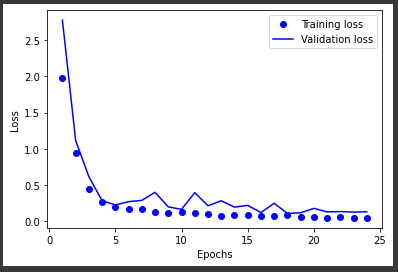

_Figure 2_

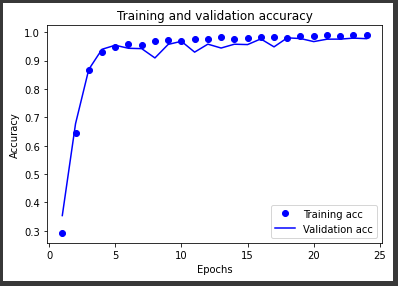

_Figure 3_



## Results
The model provided the following results on the last run when evaluating using the addNIST test data:

- Test accuracy 0.9710000157356262
- Test loss: 0.13844501972198486 
- Test precision 0.9771924614906311 
- Test recall 0.9682999849319458 
- Test F1 score 0.972725900300374 

## Evaluating the results
The primary metric we will consider is accuracy. Accuracy was picked as the metric of success for this model because it is often one of the best metrics of success for a classification model where there is a good distribution of data across the different classes, as is the case for the addNIST dataset.

DenseNet201's performance, while 'acceptable' is lower than that of the novel models designed for Tasks 1 and 2. Considering that DenseNet201's training time is considerably higher than the novel models, the accuracy result is poor.

If we also consider the charts from the training of DenseNet201 using the addNIST data, we might conclude that some kind of overfitting is taking place, possible due to DenseNet201's size and complexity. Utilising DenseNet201 as a model-as-a-layer, with other layers such as Dropout layers, could resolve the overfitting, if that is the cause of the problem.

Additional metrics have been collected, including:

- Test loss: 0.13844501972198486 
- Test precision 0.9771924614906311 
- Test recall 0.9682999849319458 
- Test F1 score 0.972725900300374

These results tell a similar story to that of the accuracy score; that effective inference is taking place. However, some improvements could be made. Notably, the test loss score is slightly higher than expected, considering the accuracy score. This might suggest that, even though there are few incorrect predictions, these predictions may be incorrect by a larger margin.


## Conclusion
While it can be concluded that DenseNet201 can be used as an effective classifier for addNIST image data. It could be argued that its performance is surprisingly poor, considering novel solutions, like those seen in the notebooks for Task-1 and Task-3, give marginally higher accuracy and have considerably lower training times.